# 单摆
参考网址：https://www.bilibili.com/video/BV1tb411G72z/?spm_id_from=333.999.0.0&vd_source=099edd8ba094e7ddc14190b99d15a5fe

给定重力加速度g，摆长l，

给定角度初值$\theta$, 以及初速度$\.\theta$

![image.png](../assert/image.png)

In [ ]:
import numpy as np

# 物理常数
g = 9.8
l = 2
miu = 0.1

# 初始条件
THETA_0 = np.pi / 3
THETA_DOT_0 = 0      #初速度为0

# 定义ODE
def get_theta_double_dot(theta, theta_dot):
    return -miu * theta_dot - g / l * np.sin(theta)

# 模拟
def theta(t):
    # 初始化变量
    theta = THETA_0
    theta_dot = THETA_DOT_0 
    delta_t = 0.01   # 时间步长
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t

    return theta

# 给定时间t，求角度theta
theta(1)

-0.46763182270170545

## 绘图版本

start draw animation, len datas: 10001


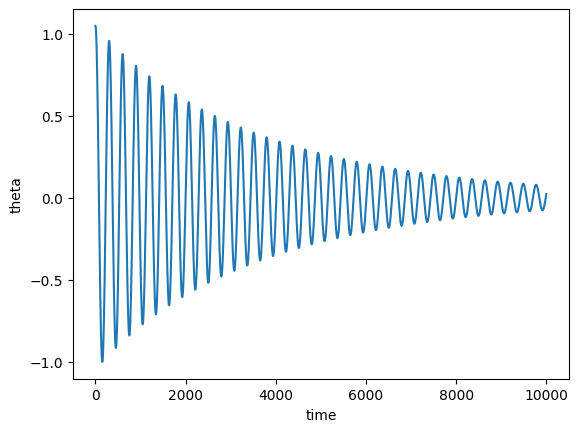

0.02281965214703735

In [12]:
from contextlib import contextmanager
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 通过上下文管理器封装之后，我们只需要实现drwa函数即可
# 在drwa函数中，实现第一幅图的绘制，在函数里面再实现一个update函数即可。
# 为了提高效率，update通常是通过句柄来更新数据，而不是再次绘制一次图。


@contextmanager
def draw_theta():
    try:
        datas = []
        yield datas
    finally:
        print('start draw animation, len datas:', len(datas))
        plt.plot(datas)
        plt.xlabel('time')
        plt.ylabel('theta')
        plt.show()


import numpy as np

# 物理常数
g = 9.8
l = 2
miu = 0.1

# 初始条件
THETA_0 = np.pi / 3
THETA_DOT_0 = 0      #初速度为0

# 定义ODE
def get_theta_double_dot(theta, theta_dot):
    return -miu * theta_dot - g / l * np.sin(theta)

# 模拟
def theta(t):
    # 初始化变量
    theta = THETA_0
    theta_dot = THETA_DOT_0 
    delta_t = 0.01   # 时间步长
    with draw_theta() as datas:
        datas.append(theta)
        for time in np.arange(0, t, delta_t):
            theta_double_dot = get_theta_double_dot(theta, theta_dot)
            theta += theta_dot * delta_t
            theta_dot += theta_double_dot * delta_t
            datas.append(theta)

    return theta

# 给定时间t，求角度theta
theta(100)





# 带空气阻力的自由落体


![image3.png](../assert/image3.png)

![image4.png](../assert/image4.png)

10001


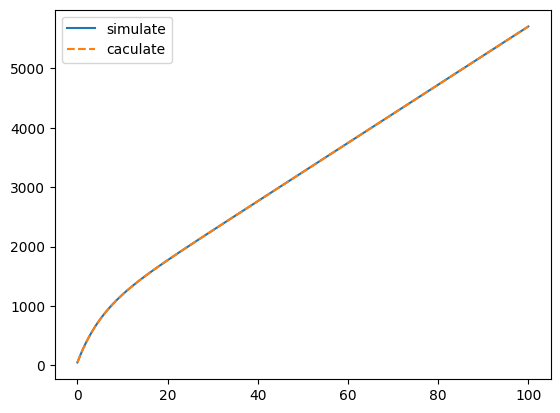

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 通常情况下，我们是在算不出来通解的情况下，通过模拟的方式来求解。
# 这次虽然可以算出来通解，但是我们可以用模拟的方式来验证一下。

# 物理常数
g = 9.8
k = 0.2 # 阻尼系数,和速度成正比， k > 0，表示空气阻力系数除以质量

# 初始条件
X_0 = 50          # 初始位置为0
X_DOT_0 = 200      # 初速度为0

# 定义ODE
def get_x_double_dot(x_dot):
    return g - k * x_dot


# 算出来的通解。
def caculate(t):
    a = X_0
    b = (g / k) * t
    ekt = np.exp(-k * t)
    c = (g - X_DOT_0 * k) / k ** 2
    return a + b + c * (ekt - 1)


simulate_data = []
caculate_data = []
# 模拟
def theta(t):
    # 初始化变量
    x = X_0
    x_dot = X_DOT_0 
    delta_t = 0.01   # 时间步长
    simulate_data.append(x)
    for time in np.arange(0, t, delta_t):
        x_double_dot = get_x_double_dot(x_dot)
        x += x_dot * delta_t
        x_dot += x_double_dot * delta_t
        simulate_data.append(x)

    return theta

# 给定时间t，求角度theta
total_time = 100
theta(total_time)

print(len(simulate_data))

t = np.linspace(0, total_time, len(simulate_data))
caculate_data = caculate(t)

plt.plot(t, simulate_data, label='simulate', linestyle='-')
plt.plot(t, caculate_data, label='caculate', linestyle='--')
plt.legend()
plt.show()

